In [3]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('cleaned_steam_game_data.csv')

X = data.drop(['name','release_date','developer','publisher','tag1', 'tag2', 'tag3','day'], axis=1)

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

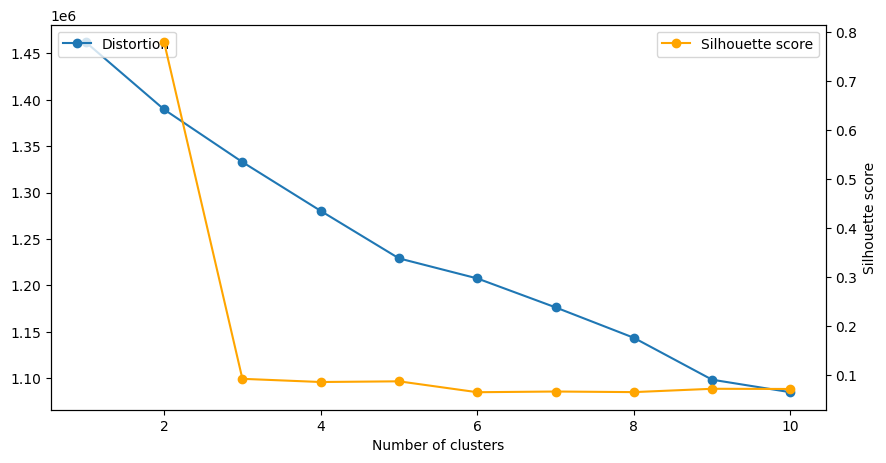

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))

distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_std)
    distortions.append(kmeans.inertia_)
ax.plot(range(1, 11), distortions, marker='o', label='Distortion')
ax.set_xlabel('Number of clusters')

silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_std)
    score = silhouette_score(X_std, kmeans.labels_)
    silhouette_scores.append(score)
ax2 = ax.twinx()
ax2.plot(range(2, 11), silhouette_scores, marker='o', color='orange', label='Silhouette score')
ax2.set_ylabel('Silhouette score')

ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                 appid   english  required_age  achievements  \
cluster                                                        
0        721336.895288  0.970108      0.146658     55.681602   
1        401438.144198  0.998199      0.682594     29.414771   
2        585748.613861  0.990099      0.000000      2.178218   

         positive_ratings  negative_ratings  average_playtime  \
cluster                                                         
0              106.076403         28.696335         34.056922   
1             2393.975161        496.348123        330.661263   
2              951.099010         66.475248         86.485149   

         median_playtime         owners      price  ...  Local Multi-player-C  \
cluster                                             ...                         
0              34.354195   27101.546329   4.495483  ...                   0.0   
1             320.656997  300699.184680   8.370906  ...                   0.0   
2              77.970297  134

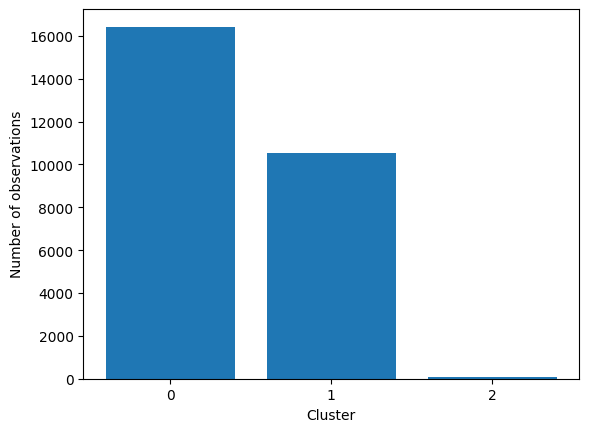

In [10]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_std)

cluster_labels = kmeans.labels_

cluster_df = pd.DataFrame(X)
cluster_df['cluster'] = kmeans.labels_
cluster_summary = cluster_df.groupby('cluster').agg('mean')

# Add a column for the number of observations in each cluster
cluster_summary['count'] = cluster_df['cluster'].value_counts()

print(cluster_summary)

cluster_counts = cluster_summary['count']

plt.bar(cluster_counts.index, cluster_counts)

plt.xlabel('Cluster')
plt.ylabel('Number of observations')
plt.xticks(cluster_counts.index)
plt.show()


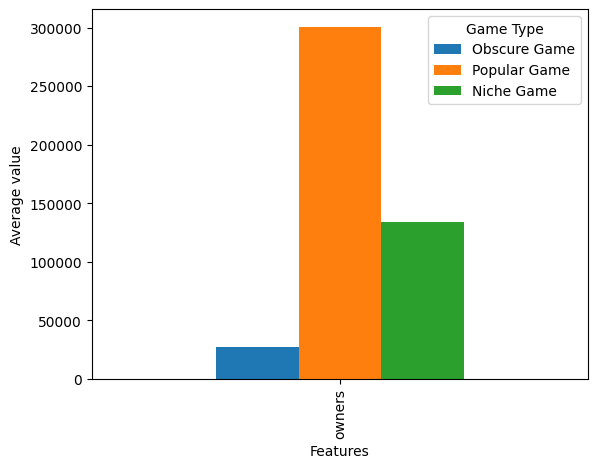

In [11]:
cluster_summary_T = cluster_summary.T

cluster_summary_T = cluster_summary_T.drop('count')

features_of_interest = ['owners']
cluster_summary_filtered = cluster_summary[features_of_interest]

cluster_summary_filtered_T = cluster_summary_filtered.T
cluster_summary_filtered_T = cluster_summary_filtered_T.rename_axis('')


cluster_summary_filtered_T.plot(kind='bar')

plt.xlabel('Features')
plt.ylabel('Average value')
legend_labels = ['Obscure Game', 'Popular Game', 'Niche Game']
plt.legend(legend_labels, title="Game Type")

plt.show()


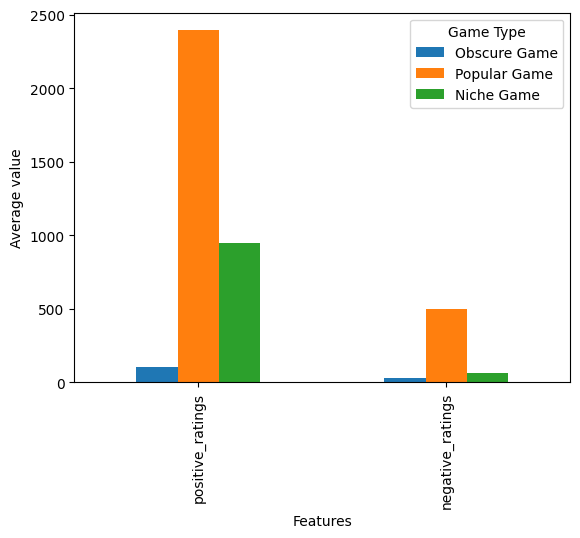

In [12]:
features_of_interest2 = ['positive_ratings','negative_ratings']
cluster_summary_filtered2 = cluster_summary[features_of_interest2]

cluster_summary_filtered_T2 = cluster_summary_filtered2.T

cluster_summary_filtered_T2.plot(kind='bar')

plt.xlabel('Features')
plt.ylabel('Average value')
legend_labels = ['Obscure Game', 'Popular Game', 'Niche Game']
plt.legend(legend_labels, title="Game Type")

plt.show()


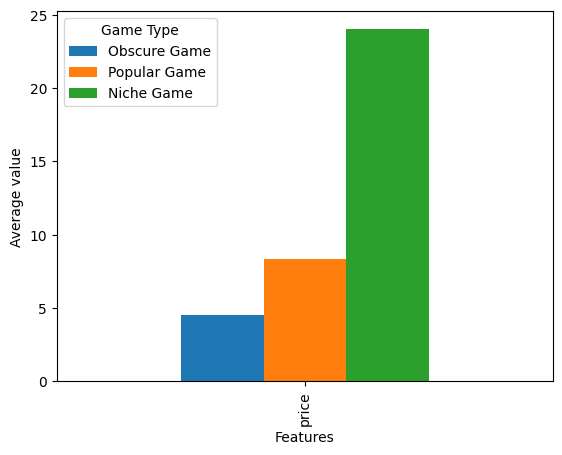

In [13]:
features_of_interest3 = ['price']
cluster_summary_filtered3 = cluster_summary[features_of_interest3]

cluster_summary_filtered_T3 = cluster_summary_filtered3.T

cluster_summary_filtered_T3.plot(kind='bar')

plt.xlabel('Features')
plt.ylabel('Average value')

legend_labels = ['Obscure Game', 'Popular Game', 'Niche Game']
plt.legend(legend_labels, title="Game Type")

plt.show()

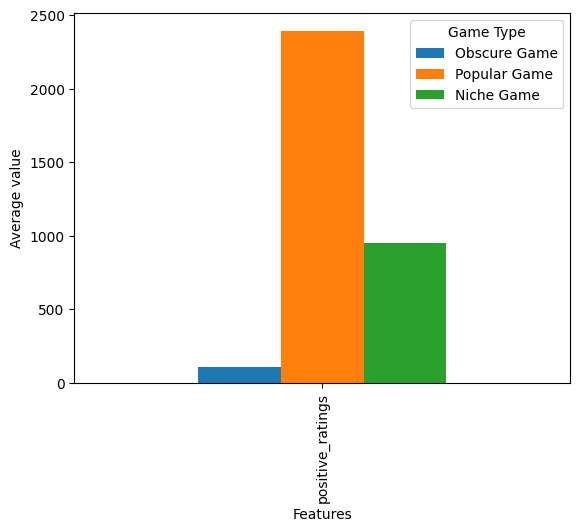

In [14]:
features_of_interest4 = ['positive_ratings']
cluster_summary_filtered4 = cluster_summary[features_of_interest4]

cluster_summary_filtered_T4 = cluster_summary_filtered4.T

cluster_summary_filtered_T4.plot(kind='bar')

plt.xlabel('Features')
plt.ylabel('Average value')
legend_labels = ['Obscure Game', 'Popular Game', 'Niche Game']
plt.legend(legend_labels, title="Game Type")
plt.show()

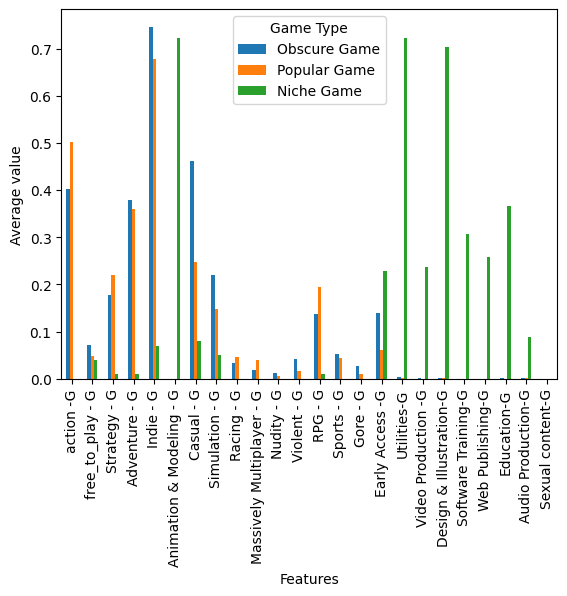

In [15]:
cluster_summary_filtered6 = cluster_summary.iloc[:,10:34]

cluster_summary_filtered_T6 = cluster_summary_filtered6.T

cluster_summary_filtered_T6.plot(kind='bar')

plt.xlabel('Features')
plt.ylabel('Average value')
legend_labels = ['Obscure Game', 'Popular Game', 'Niche Game']
plt.legend(legend_labels, title="Game Type")


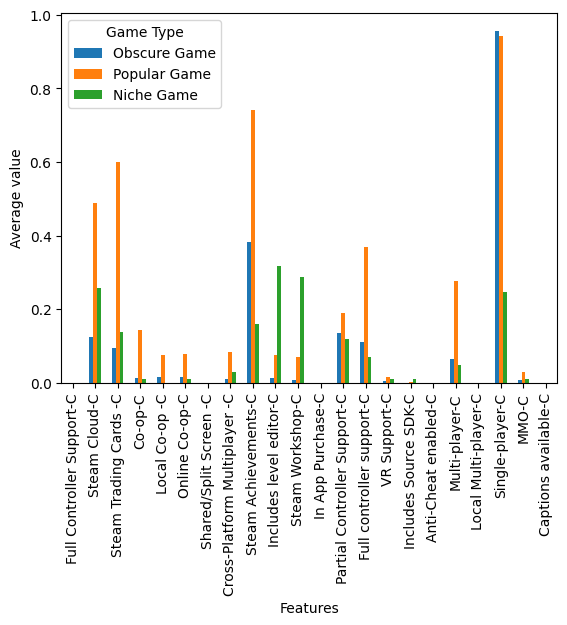

In [16]:
cluster_summary_filtered7 = cluster_summary.iloc[:,35:57]

cluster_summary_filtered_T7 = cluster_summary_filtered7.T

cluster_summary_filtered_T7.plot(kind='bar')

# Add labels for the x and y axes
plt.xlabel('Features')
plt.ylabel('Average value')
legend_labels = ['Obscure Game', 'Popular Game', 'Niche Game']
plt.legend(legend_labels, title="Game Type")

plt.show()